In [ ]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import seaborn as sns  # For data visualizations
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/framingham_heart_study.csv')

In [ ]:
df


NameError: name 'df' is not defined

In [ ]:
df.shape

(4240, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,644


In [ ]:
majority_data= df[ df['TenYearCHD'] == 0 ]
minority_data= df[ df['TenYearCHD'] == 1 ]


In [ ]:
majority_data.shape, minority_data.shape


((3596, 16), (644, 16))

In [ ]:
from sklearn.utils import resample

In [ ]:
upsampled_minority_data= resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)

In [ ]:
# Reset the index of the upsampled minority data
upsampled_minority_data = upsampled_minority_data.reset_index(drop=True)

# Reset index for majority data too (if necessary)
majority_data = majority_data.reset_index(drop=True)

# Combine the datasets into balanced_data
balanced_data = pd.concat([majority_data, upsampled_minority_data]).reset_index(drop=True)

In [ ]:
balanced_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,0,57,1.0,0,0.0,0.0,0,1,0,207.0,175.0,80.0,20.86,83.0,75.0,1
7188,0,62,2.0,0,0.0,0.0,0,1,0,276.0,185.0,95.0,26.21,80.0,110.0,1
7189,1,58,4.0,0,0.0,0.0,0,1,0,320.0,139.0,81.5,23.65,80.0,82.0,1
7190,0,64,NaN,0,0.0,0.0,0,0,0,293.0,116.0,80.0,26.81,80.0,87.0,1


In [ ]:
balanced_data['TenYearCHD'].value_counts()


,count
TenYearCHD,
0,3596
1,3596


In [ ]:
balanced_data['TenYearCHD']


,TenYearCHD
0,0
1,0
2,0
3,0
4,0
...,...
7187,1
7188,1
7189,1
7190,1


In [ ]:
# Shuffle the balanced_data
df= balanced_data.sample(frac=1).reset_index(drop=True)


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,60,1.0,1,10.0,0.0,0,1,0,217.0,167.0,109.0,24.86,95.0,72.0,1
1,0,59,3.0,0,0.0,0.0,0,0,0,271.0,117.5,65.0,19.77,70.0,89.0,1
2,0,51,2.0,1,10.0,0.0,0,0,0,255.0,102.5,64.5,24.14,65.0,71.0,0
3,1,58,4.0,0,0.0,0.0,0,1,0,320.0,139.0,81.5,23.65,80.0,82.0,1
4,0,67,1.0,0,0.0,0.0,0,1,0,302.0,147.0,92.0,25.23,80.0,87.0,1


In [ ]:
df.isna().sum()

,0
male,0
age,0
education,163
currentSmoker,0
cigsPerDay,38
BPMeds,124
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,76


In [ ]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.033220,0.041290,0.242843,0.348730,-0.075392,-0.026430,-0.014723,0.007234,-0.077632,-0.036448,0.059294,0.039873,-0.088331,-0.010591,0.125318
age,-0.033220,1.000000,-0.170231,-0.213197,-0.185035,0.127019,0.082445,0.329765,0.099232,0.212928,0.390976,0.163118,0.120921,-0.006987,0.128788,0.303750
education,0.041290,-0.170231,1.000000,0.021717,0.029858,0.006807,-0.059131,-0.080353,-0.052917,0.031328,-0.117413,-0.015987,-0.140257,-0.027093,-0.029061,-0.077113
currentSmoker,0.242843,-0.213197,0.021717,1.000000,0.777377,-0.073276,-0.025414,-0.117038,-0.055933,-0.048591,-0.110621,-0.073672,-0.152603,0.081957,-0.059010,0.044786
cigsPerDay,0.348730,-0.185035,0.029858,0.777377,1.000000,-0.070285,-0.037767,-0.085554,-0.050565,-0.023013,-0.071529,-0.037981,-0.096735,0.098520,-0.050667,0.091110
BPMeds,-0.075392,0.127019,0.006807,-0.073276,-0.070285,1.000000,0.042940,0.258245,0.107298,0.102686,0.274350,0.203582,0.086063,0.069879,0.136380,0.087326
prevalentStroke,-0.026430,0.082445,-0.059131,-0.025414,-0.037767,0.042940,1.000000,0.095876,0.028786,0.008498,0.067475,0.054756,0.015889,0.008996,0.040049,0.057470
prevalentHyp,-0.014723,0.329765,-0.080353,-0.117038,-0.085554,0.258245,0.095876,1.000000,0.098790,0.164535,0.694951,0.592746,0.291045,0.155007,0.114754,0.232421
diabetes,0.007234,0.099232,-0.052917,-0.055933,-0.050565,0.107298,0.028786,0.098790,1.000000,0.051020,0.136039,0.039758,0.104863,0.067572,0.737846,0.117758
totChol,-0.077632,0.212928,0.031328,-0.048591,-0.023013,0.102686,0.008498,0.164535,0.051020,1.000000,0.192789,0.159667,0.106923,0.081692,0.069741,0.117209


<Axes: >

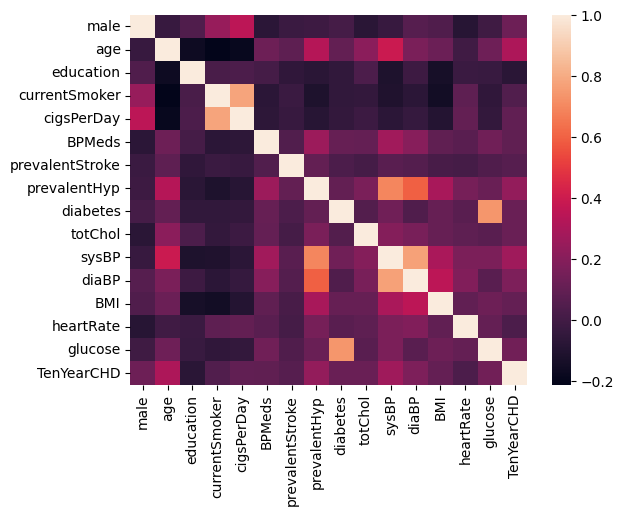

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Get the features and labels
X= df.drop('TenYearCHD', axis=1)
y= df['TenYearCHD']

In [ ]:
# Identify continuous numeric columns
continuous_numeric_features = [col for col in X.columns if X[col].nunique() >= 10]

# Identify the rest of the numeric features
other_numeric_features = [col for col in X.columns if col not in continuous_numeric_features]

In [ ]:
for col in other_numeric_features:
    print(f"{df[col].value_counts()}\n")

male
0    3788
1    3404
Name: count, dtype: int64

education
1.0    3214
2.0    1924
3.0    1106
4.0     785
Name: count, dtype: int64

currentSmoker
1    3685
0    3507
Name: count, dtype: int64

BPMeds
0.0    6782
1.0     286
Name: count, dtype: int64

prevalentStroke
0    7124
1      68
Name: count, dtype: int64

prevalentHyp
0    4393
1    2799
Name: count, dtype: int64

diabetes
0    6882
1     310
Name: count, dtype: int64



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn xgboost lightgbm


In [ ]:
# Import tools for train-test split
from sklearn.model_selection import train_test_split

# Import tools for data preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

# Import metrics and PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

In [ ]:
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [ ]:
# Define a pipeline for continuous numeric transformations
continuous_numeric_transformer = Pipeline([
    ('knn_imputer', KNNImputer(weights='distance')),
    ('power_transformer', PowerTransformer())
])

In [ ]:
# Define a pipeline for other numeric transformations
other_numeric_transformer = Pipeline([
    ('knn_imputer', KNNImputer(weights='distance'))
])

In [ ]:
# Define a ColumnTransformer for preprocessing different numeric feature groups
preprocessor = ColumnTransformer([
    ('continuous_numeric_transformer', continuous_numeric_transformer, continuous_numeric_features),
    ('other_numeric_transformer', other_numeric_transformer, other_numeric_features)
])

In [ ]:
models = [
    LogisticRegression(), SGDClassifier(), SVC(), KNeighborsClassifier(),
    DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Initialize variables to track the best model and F1 score
best_model = None
best_f1 = 0
for model in models:
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline on training data
    pipe.fit(X_train, y_train)

    # Make predictions on test data
    y_preds = pipe.predict(X_test)
    f1_sc = f1_score(y_test, y_preds)


    # Print the model and its F1 score
    print(f"{model} := {f1_sc}\n")

LogisticRegression() := 0.6708507670850767

SGDClassifier() := 0.6965174129353234

SVC() := 0.7221843003412969

KNeighborsClassifier() := 0.8340530536705737

DecisionTreeClassifier() := 0.9139987445072191

RandomForestClassifier() := 0.9766199064796259

GradientBoostingClassifier() := 0.7443762781186094

AdaBoostClassifier() := 0.6876254180602007



In [ ]:
# Find the best number of components for PCA based on F1 score
max_f1 = 0
best_comps = 0

# Iterate over possible number of components for PCA (1 to 15)
for i in range(1, 16):
    # Create a pipeline with preprocessor, PCA, and the best model
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('PCA', PCA(n_components=i)),  # Apply PCA with i components
        ('model', RandomForestClassifier()),
    ])

    # Fit the pipeline on training data
    pipe.fit(X_train, y_train)

    # Make predictions on test data
    y_preds = pipe.predict(X_test)

    # Calculate the F1 score
    f1_sc = f1_score(y_test, y_preds)

    # Print the F1 score for the current number of components
    print(f"{i} comps := {f1_sc}")

# Print the best number of components and the corresponding F1 score
print(f"\n\nBest comps: {best_comps}, F1: {max_f1}")

1 comps := 0.9158291457286433
2 comps := 0.9498371335504886
3 comps := 0.9560078791858174
4 comps := 0.9623265036351619
5 comps := 0.9642384105960264
6 comps := 0.9687292082501663
7 comps := 0.9732620320855615
8 comps := 0.9726118904475618
9 comps := 0.9804713804713805
10 comps := 0.9818670248488919
11 comps := 0.9798115746971736
12 comps := 0.9758713136729222
13 comps := 0.978494623655914
14 comps := 0.9771812080536912
15 comps := 0.9832102081934184


Best comps: 0, F1: 0


In [ ]:
# Find the best number of components for PCA based on F1 score
max_f1 = 0
best_comps = 0

# Iterate over possible number of components for PCA (1 to 15)

# Initialize variables to track the best model and F1 score outside the loop
best_model = None
best_f1 = 0

models = [
    LogisticRegression(), SGDClassifier(), SVC(), KNeighborsClassifier(),
    DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(),
    AdaBoostClassifier()
]

for model in models:
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline on training data
    pipe.fit(X_train, y_train)

    # Make predictions on test data
    y_preds = pipe.predict(X_test)
    f1_sc = f1_score(y_test, y_preds)

    # Update best_model if current model has a better F1 score
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_model = model

    # Print the model and its F1 score
    print(f"{model} := {f1_sc}\n")
# The best model is now stored in 'best_model'

# Now, you can proceed with PCA optimization using the 'best_model'

for i in range(1, 16):
    # Create a pipeline with preprocessor, PCA, and the best model
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('PCA', PCA(n_components=i)),  # Apply PCA with i components
        ('model', RandomForestClassifier(bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200))
    ])

    # Fit the pipeline on training data
    pipe.fit(X_train, y_train)

    # Make predictions on test data
    y_preds = pipe.predict(X_test)

    # Calculate the F1 score
    f1_sc = f1_score(y_test, y_preds)

    # Update max_f1 and best_comps if current configuration is better
    if f1_sc > max_f1:
        max_f1 = f1_sc
        best_comps = i
    # Print the F1 score for the current number of components
    print(f"{i} comps := {f1_sc}")

# Print the best number of components and the corresponding F1 score
print(f"\n\nBest comps: {best_comps}, F1: {max_f1}")

LogisticRegression() := 0.6708507670850767

SGDClassifier() := 0.6731436502428869

SVC() := 0.7221843003412969

KNeighborsClassifier() := 0.8340530536705737

DecisionTreeClassifier() := 0.9232720355104629

RandomForestClassifier() := 0.9753168779186124

GradientBoostingClassifier() := 0.7443762781186094

AdaBoostClassifier() := 0.6876254180602007

1 comps := 0.9158291457286433
2 comps := 0.9573210768220617
3 comps := 0.9719626168224299
4 comps := 0.9745649263721553
5 comps := 0.9771812080536912
6 comps := 0.9798115746971736
7 comps := 0.9871186440677966
8 comps := 0.9877883310719131
9 comps := 0.9877883310719131
10 comps := 0.986449864498645
11 comps := 0.9871186440677966
12 comps := 0.9877883310719131
13 comps := 0.9898028552005439
14 comps := 0.988458927359131
15 comps := 0.9918588873812755


Best comps: 15, F1: 0.9918588873812755


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#hyperparameter tunning for RandomForestClassifier()
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9688872436066938
Test Set Accuracy: 0.9861014593467686


In [ ]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('PCA', PCA(n_components=15)),
    ('model', RandomForestClassifier(bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200))
])

# Fit the pipeline on training data
pipe.fit(X_train, y_train)

# Make predictions on test data
y_preds = pipe.predict(X_test)
# Calculate various performance metrics
acc_sc = accuracy_score(y_test, y_preds)
prc_sc = precision_score(y_test, y_preds)
rcl_sc = recall_score(y_test, y_preds)
f1_sc = f1_score(y_test, y_preds)

# Print the performance metrics
print(f"Accuracy: {acc_sc}\nPrecision: {prc_sc}\nRecall: {rcl_sc}\nF1: {f1_sc}")

Accuracy: 0.990271021542738
Precision: 0.9891304347826086
Recall: 0.9918256130790191
F1: 0.9904761904761905
